# Face Detection

## Import Packages

In [69]:
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp

In [70]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

## Function
Colab 또는 Jupyter Notebook에서 이미지를 확인하기 위한 Function입니다.

In [71]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

이미지에서 얼굴을 찾아내는 Function입니다.

In [75]:
def face_detection(image, conf=0.5):
    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=conf) as face_detection:
        results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        if not results.detections:
            print("Face not found in image")
        else:
            print('Found {} faces.'.format(len(results.detections)))
            annotated_image = image.copy()

            for detection in results.detections:
                # print('Nose tip:')
                # print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))

                mp_drawing.draw_detection(image=annotated_image, 
                                          detection=detection, 
                                          keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 255), thickness=2),
                                          bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=3))
            
            plt_imshow(["Original", "Find Faces"], [image, annotated_image], figsize=(16,10))

In [76]:
image_path = 'asset/images/2021_g7_1.jpg'
image = cv2.imread(image_path)

Found 5 faces.


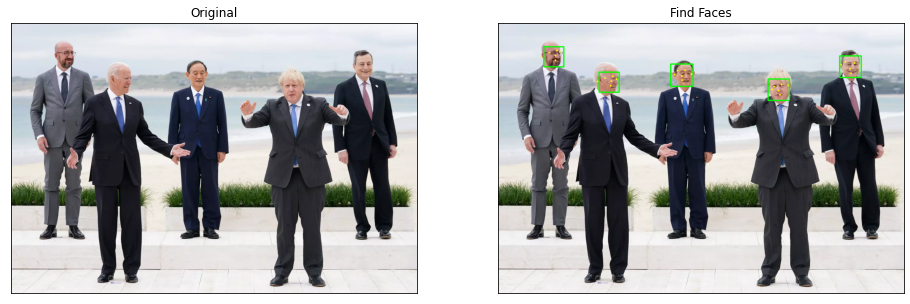

In [77]:
face_detection(image, 0.5)